In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test["Survived"]=""

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [14]:
def bar_graph(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['survived', 'dead']
    df.plot(kind="bar", stacked=True, figsize=(10,5))
    print("survived: \n", survived)
    print("dead: \n",dead)

survived: 
 female    233
male      109
Name: Sex, dtype: int64
dead: 
 male      468
female     81
Name: Sex, dtype: int64


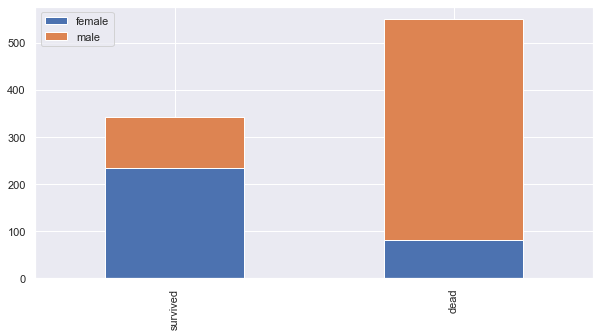

In [15]:
bar_graph("Sex")

survived: 
 1    136
3    119
2     87
Name: Pclass, dtype: int64
dead: 
 3    372
2     97
1     80
Name: Pclass, dtype: int64


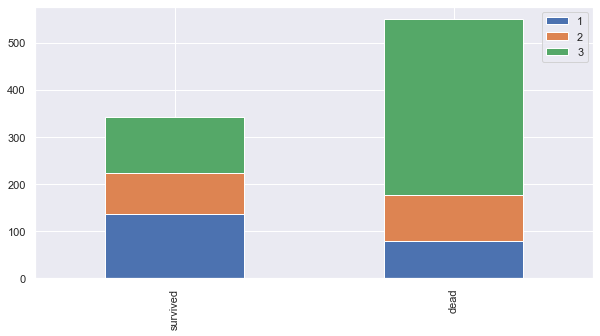

In [16]:
bar_graph("Pclass")

survived: 
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
dead: 
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


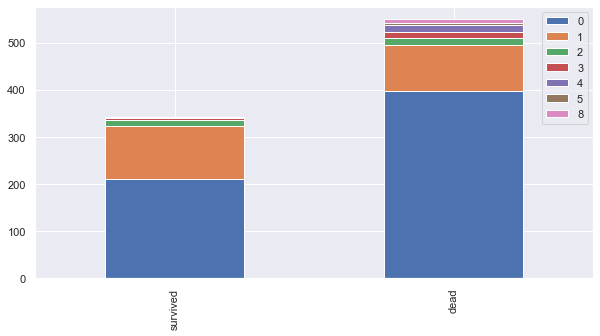

In [17]:
bar_graph("SibSp")

survived: 
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
dead: 
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


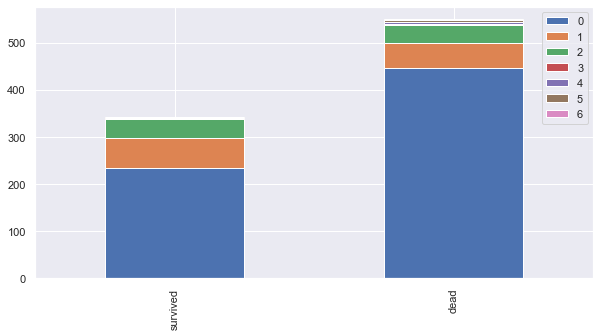

In [18]:
bar_graph("Parch")

survived: 
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
dead: 
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


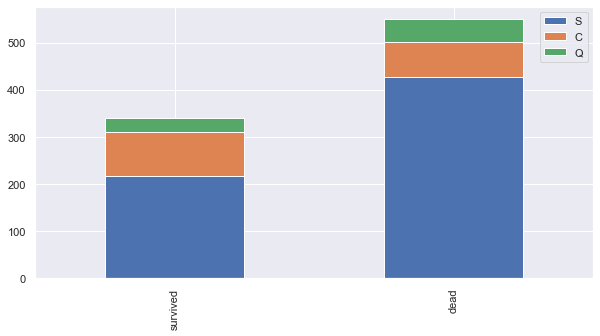

In [19]:
bar_graph("Embarked")

In [20]:
train_test=[train,test]

for data in train_test:
    data['title']=data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [21]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Countess      1
Sir           1
Mme           1
Capt          1
Lady          1
Jonkheer      1
Ms            1
Name: title, dtype: int64

In [22]:
test['title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: title, dtype: int64

In [23]:
mapping={"Mr":0, "Miss":1, "Mrs":2, 
         "Master":3, "Col":3, "Rev":3, "Ms":3, "Dr":3, "Dona":3, "Lady":3, 
         "Sir":3, "Capt":3, "Jonkheer":3, "Don":3, "Mme":3, "Countess":3, "Major":3, "Mlle":3 }

for data in train_test:
    data['title']=data['title'].map(mapping)

In [24]:
train['title'].value_counts()

0    517
1    182
2    125
3     67
Name: title, dtype: int64

In [25]:
test['title'].value_counts()

0    240
1     78
2     72
3     28
Name: title, dtype: int64

In [26]:
train.drop("Name", axis=1, inplace=True)

In [27]:
test.drop("Name",axis=1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


survived: 
 1    127
2     99
0     81
3     35
Name: title, dtype: int64
dead: 
 0    436
1     55
3     32
2     26
Name: title, dtype: int64


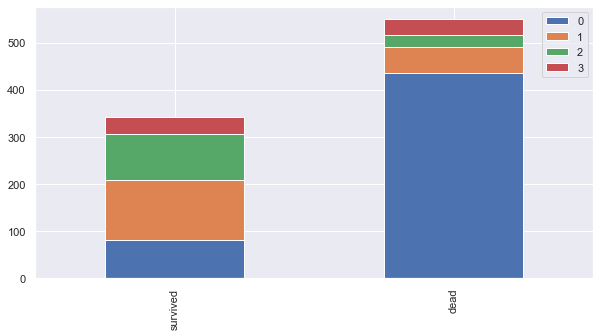

In [29]:
bar_graph('title')

In [30]:
gender={"male":0, "female":1}

for data in train_test:
    data['Sex']=data['Sex'].map(gender)

survived: 
 1    233
0    109
Name: Sex, dtype: int64
dead: 
 0    468
1     81
Name: Sex, dtype: int64


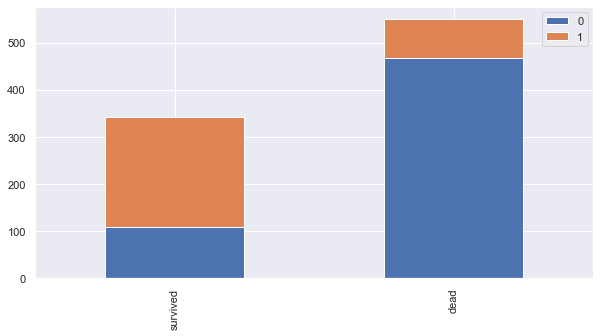

In [31]:
bar_graph('Sex')

In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,,2


In [33]:
train["Age"].fillna(train.groupby("title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("title")["Age"].transform("median"), inplace=True)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null object
title          418 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


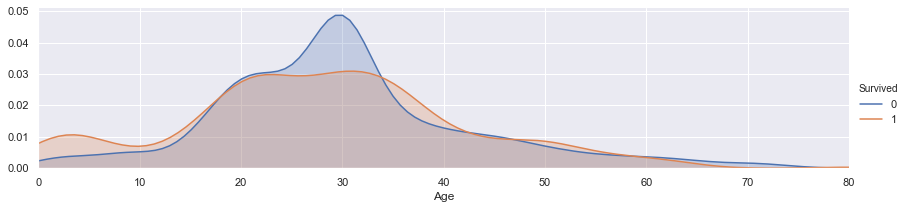

In [44]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

(10, 50)

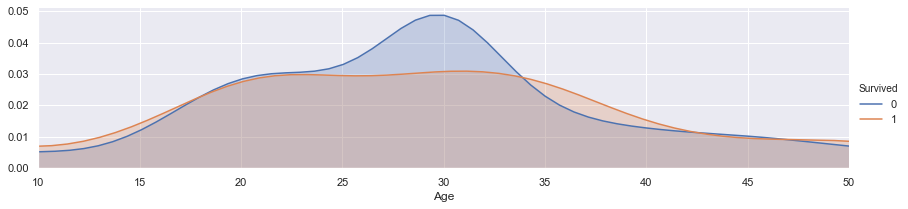

In [47]:
facet=sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(10,50)

In [53]:
for data in train_test:
    data.loc[data['Age']<=16,'Age']=0,
    data.loc[(data['Age']>16)&(data['Age']<=26),'Age']=1,
    data.loc[(data['Age']>26)&(data['Age']<=36),'Age']=2,
    data.loc[(data['Age']>36)&(data['Age']<=62),'Age']=3,
    data.loc[data['Age']>62,'Age']=4

survived: 
 2.0    116
1.0     97
3.0     69
0.0     57
4.0      3
Name: Age, dtype: int64
dead: 
 2.0    220
1.0    158
3.0    111
0.0     48
4.0     12
Name: Age, dtype: int64


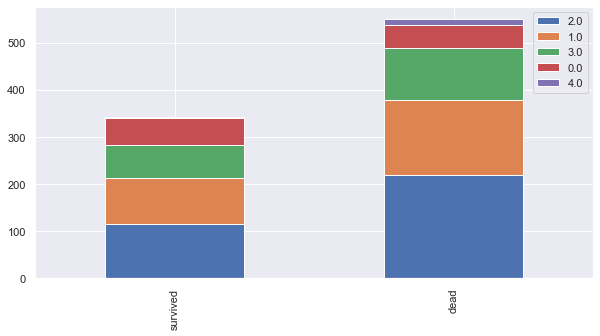

In [55]:
bar_graph('Age')

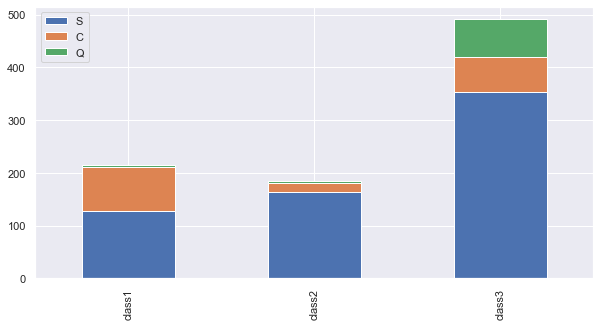

S    127
C     85
Q      2
Name: Embarked, dtype: int64
S    164
C     17
Q      3
Name: Embarked, dtype: int64
S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [57]:
class1=train[train["Pclass"]==1]['Embarked'].value_counts()
class2=train[train["Pclass"]==2]['Embarked'].value_counts()
class3=train[train["Pclass"]==3]['Embarked'].value_counts()

df=pd.DataFrame([class1, class2, class3])
df.index=["class1", "class2", "class3"]
df.plot(kind="bar", stacked=True, figsize=(10,5))
plt.show()

print(class1)
print(class2)
print(class3)

In [58]:
for data in train_test:
    data["Embarked"]=data['Embarked'].fillna('S')

In [59]:
mapping={'S':0, 'C':1, 'Q':2}
for data in train_test:
    data['Embarked']=data['Embarked'].map(mapping)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [61]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

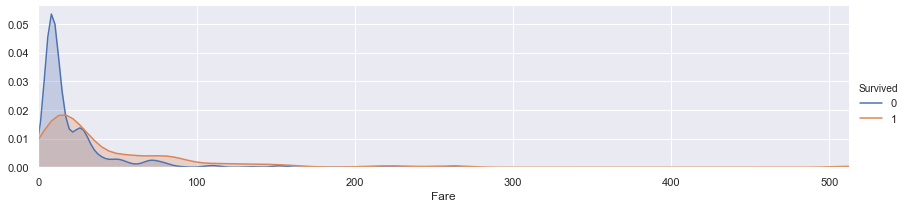

In [63]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

(0, 20)

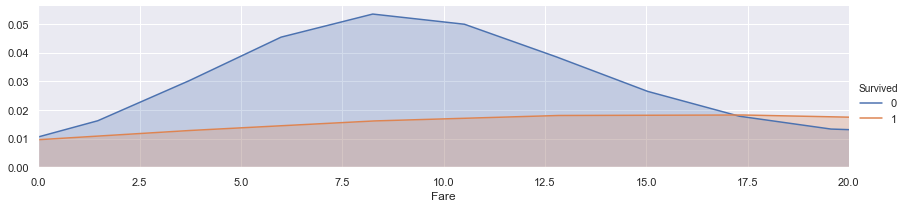

In [64]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

(20, 30)

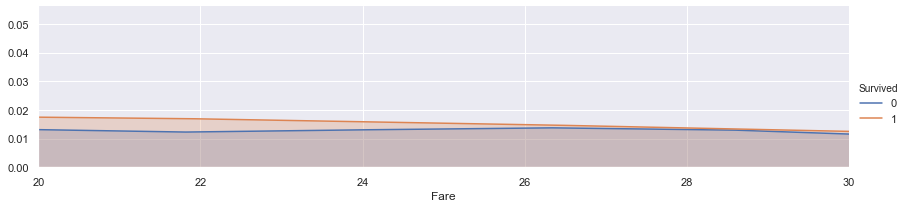

In [65]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(20,30)

(30, 100)

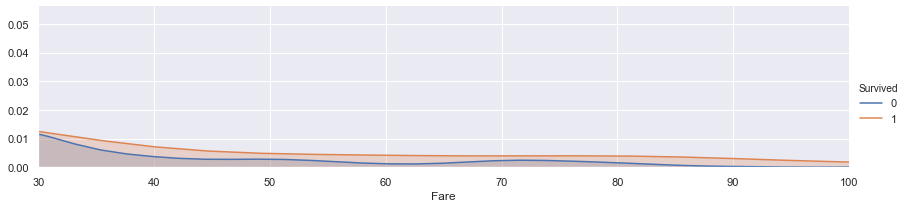

In [66]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(30,100)

In [67]:
for data in train_test:
    data.loc[data['Fare']<=17, 'Fare']=0,
    data.loc[(data['Fare']>17) & (data['Fare']<=30), 'Fare']=1,
    data.loc[(data['Fare']>30) & (data['Fare']<=100), 'Fare']=2,
    data.loc[data['Fare']>100, 'Fare']=3

survived: 
 0.0    132
2.0     97
1.0     74
3.0     39
Name: Fare, dtype: int64
dead: 
 0.0    364
1.0     87
2.0     84
3.0     14
Name: Fare, dtype: int64


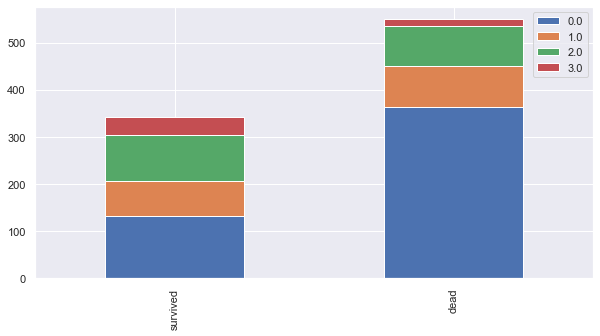

In [68]:
bar_graph('Fare')

In [69]:
train['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
F33            3
              ..
A6             1
E49            1
C101           1
C128           1
F E69          1
Name: Cabin, Length: 147, dtype: int64

In [70]:
for data in train_test:
    data['Cabin']=data['Cabin'].str[:1]

In [71]:
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [72]:
mapping={'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T':2.8,}

for data in train_test:
    data['Cabin']=data['Cabin'].map(mapping)

In [73]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [74]:
train.Cabin.value_counts()

2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: Cabin, dtype: int64

In [76]:
train['fam']=train['SibSp']+train['Parch']+1
test['fam']=test['SibSp']+test['Parch']+1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,fam
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,1


In [77]:
train.fam.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: fam, dtype: int64

In [78]:
test.fam.value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: fam, dtype: int64

In [79]:
mapping={1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}

for data in train_test:
    data['fam']=data['fam'].map(mapping)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,fam
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [81]:
train=train.drop(['PassengerId','SibSp', 'Parch','Ticket'], axis=1)
test=test.drop(['SibSp', 'Parch','Ticket'], axis=1)

In [82]:
train_data=train.drop(['Survived'],axis=1)
target=train['Survived']

In [83]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [84]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,title,fam
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [95]:
from sklearn.model_selection import KFold, cross_val_score

In [96]:
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [100]:
clf=[KNeighborsClassifier(n_neighbors=13), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=13), 
     GaussianNB(), SVC(), ExtraTreeClassifier(), AdaBoostClassifier(), ExtraTreesClassifier()
#      GradientBoostingClassifier(n_estimators=10, learning_rate=1, max_features=3, max_depth=3, random_state=10)
    ]

def model_fit():
    scoring='accuracy'
    for i in range(len(clf)):
        score=cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of ",i, ": ", round(np.mean(score)*100,2))
        
model_fit()

Score of  0 :  82.6
Score of  1 :  79.24
Score of  2 :  81.03
Score of  3 :  78.78


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

Score of  4 :  83.5
Score of  5 :  77.78
Score of  6 :  81.03


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

Score of  7 :  80.36


In [101]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,title,fam
0,892,3,0,2.0,0.0,2.0,2,,0,0.0
1,893,3,1,3.0,0.0,2.0,0,,2,0.4
2,894,2,0,3.0,0.0,2.0,2,,0,0.0
3,895,3,0,2.0,0.0,2.0,0,,0,0.0
4,896,3,1,1.0,0.0,2.0,0,,2,0.8


In [102]:
clf1=SVC()
clf1.fit(train_data, target)
test_data=test.drop(['PassengerId', 'Survived'], axis=1)
pred=clf1.predict(test_data)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [103]:
test_data['Survived']=pred
res=pd.DataFrame(test['PassengerId'], test_data['Survived'])
res.head()

,PassengerId
Survived,
0,892
1,893
0,892
0,892
1,893
